In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 

Будем учиться классифицировать жанры музыки, полузуюсь не аудио дорожками, а уже осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [76]:
data = pd.read_csv("data/train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [26]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [27]:
data.shape

(17996, 17)

Check missing values

In [28]:
pd.DataFrame(data.isnull().sum())

,0
Artist Name,0
Track Name,0
Popularity,428
danceability,0
energy,0
key,2014
loudness,0
mode,0
speechiness,0
acousticness,0


There are missing values in columns popularity, key and instrumentalness

To identify categorical columns, let's look at the number of unique values in each column

In [29]:
for col in data.columns:
    print(col + ": " + str(data[col].nunique()))

Artist Name: 9149
Track Name: 15129
Popularity: 100
danceability: 909
energy: 1208
key: 11
loudness: 9002
mode: 2
speechiness: 1194
acousticness: 3930
instrumentalness: 4253
liveness: 1459
valence: 1320
tempo: 13562
duration_in min/ms: 14121
time_signature: 4
Class: 11


Key, mode, time_signature and class are categorical columns

Let's check the distribution and see if there are outliers

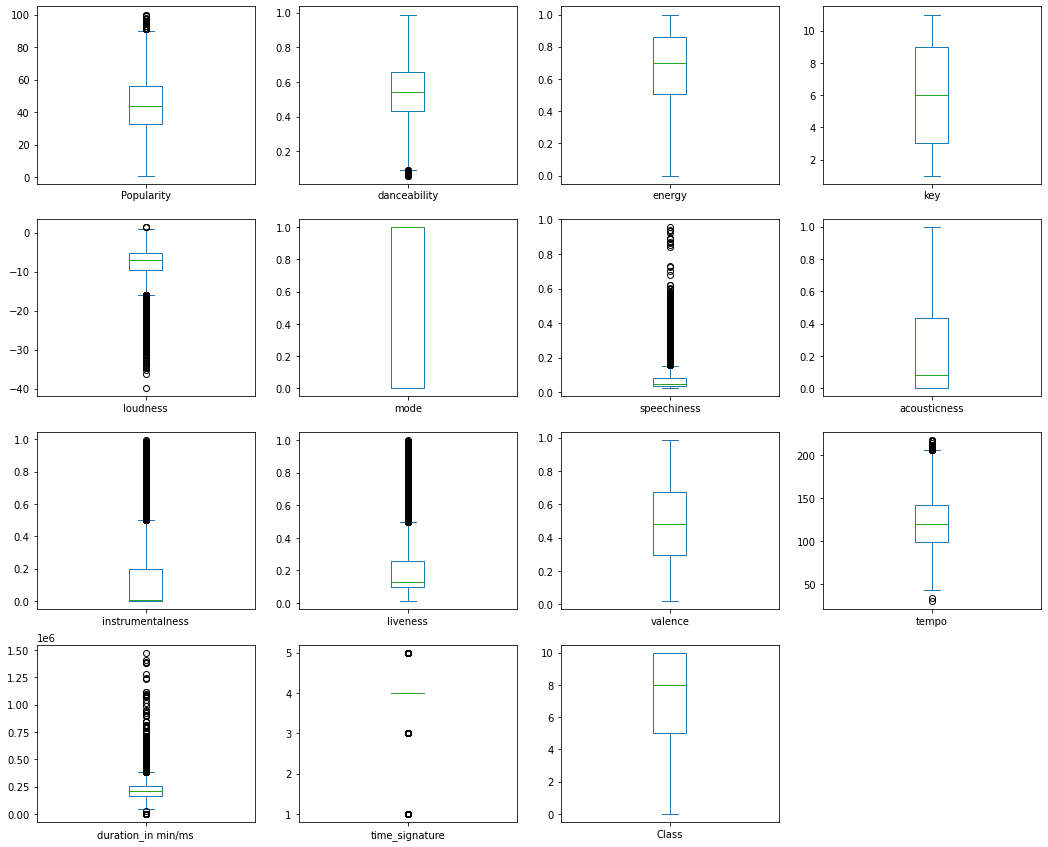

In [30]:
data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (4,4))
plt.show()

Change data type for categorical columns

In [31]:
data[["key", "mode", "time_signature"]] = data[["key", "mode", "time_signature"]].astype("category")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Artist Name         17996 non-null  object  
 1   Track Name          17996 non-null  object  
 2   Popularity          17568 non-null  float64 
 3   danceability        17996 non-null  float64 
 4   energy              17996 non-null  float64 
 5   key                 15982 non-null  category
 6   loudness            17996 non-null  float64 
 7   mode                17996 non-null  category
 8   speechiness         17996 non-null  float64 
 9   acousticness        17996 non-null  float64 
 10  instrumentalness    13619 non-null  float64 
 11  liveness            17996 non-null  float64 
 12  valence             17996 non-null  float64 
 13  tempo               17996 non-null  float64 
 14  duration_in min/ms  17996 non-null  float64 
 15  time_signature      17996 non-null  

Let's look at the distribution of the target variable 'class'

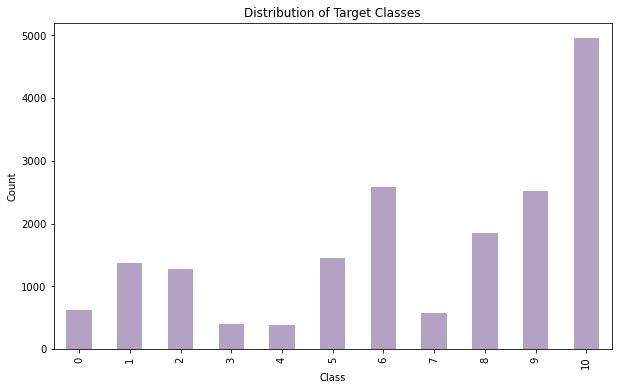

In [33]:
plt.figure(figsize=(10, 6))
data['Class'].value_counts().sort_index().plot(kind='bar', color='#b4a2c5')
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The distribution is not even

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Let's impute the missing values: mode for 'popularity' and 'key', median for 'instrumentalness'

In [34]:
mode = data["Popularity"].mode()
data["Popularity"] = data["Popularity"].fillna(mode[0])
mode = data["key"].mode()
data["key"] = data["key"].fillna(mode[0])
median = data["instrumentalness"].median()
data["instrumentalness"] =  data["instrumentalness"].fillna(median)

Transforming categorical values in "key", "mode", "time_signature" columns

In [48]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

data['key'] = label_encoder.fit_transform(data['key'])
data['mode'] = label_encoder.fit_transform(data['mode'])
data['time_signature'] = label_encoder.fit_transform(data['time_signature'])
data['Class'] = label_encoder.fit_transform(data['Class'])

Next, let's remove "Artist name" and "Track name" columns as they don't help to predict music genre 

In [49]:
y = data["Class"]
X = data.drop(["Class", "Artist Name", "Track Name"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Let's use GridSearchCV to identify best parameters

In [74]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]}

In [64]:
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
#tree_clf.fit(X_train, y_train)
#y_pred = tree_clf.predict(X_test)
best_params = grid_search.best_params_
print(best_params)
best_tree_clf = grid_search.best_estimator_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


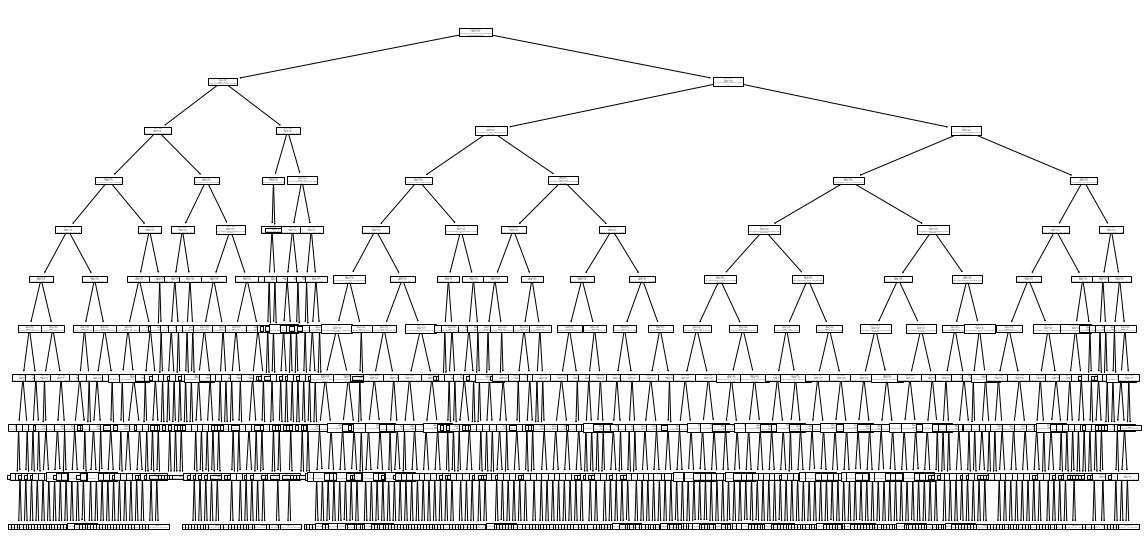

In [65]:
plt.figure(figsize=(20, 10))
tree.plot_tree(best_tree_clf)
plt.show()

# Make predictions with the best model
y_pred = best_tree_clf.predict(X_test)

Metrics

In [73]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\n Classification report: \n \n ", classification_report(y_test, y_pred))
print("Confusion matrix: \n \n ", confusion_matrix(y_test, y_pred))

Accuracy: 0.4925

 Classification report: 
 
                precision    recall  f1-score   support

           0       0.62      0.68      0.65       136
           1       0.16      0.02      0.04       254
           2       0.34      0.23      0.27       277
           3       0.69      0.63      0.66        82
           4       0.64      0.60      0.62        81
           5       0.68      0.65      0.67       297
           6       0.38      0.30      0.33       473
           7       0.88      0.91      0.90       122
           8       0.60      0.43      0.50       379
           9       0.47      0.50      0.48       506
          10       0.44      0.65      0.52       993

    accuracy                           0.49      3600
   macro avg       0.54      0.51      0.51      3600
weighted avg       0.48      0.49      0.47      3600

Confusion matrix: 
 
  [[ 93   0   0  17   6   0   0   6   0  11   3]
 [  0   6  13   0   0  10  47   0  11  25 142]
 [  0   3  63   0   0  

Using GridSearchCV improved the accuracy

### Задание 3. Другие модели (без баллов, просто если есть желание)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

### Задание 4. (0.5 доп. балла)

Расскажите про свои любимые фильмы, мультики и тд.

расскажу о тех, что смотрела не так давно

1. Fallen leaves (2023)

2. Two hands (1999)

3. Down by Law (1986)